In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

import os
os.chdir("C:\\Users\Poonam Vijay\Downloads")

from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("OlympicsMaster3.csv", encoding = "ISO-8859-1", engine='python')  

In [3]:
df.head()

,Country_Id,Country,GDP,HDI,No of athletes,Medals_in_3rdLast_Olympics,Medals_in_2ndLast_Olympics,Medals_in_Last_Olympics,Medals_in_Current_Olympics
0,20210001,Afghanistan,665,0.49056,3,0,1,1,0
1,20210002,Albania,4275,0.76320,6,0,0,0,0
2,20210003,Algeria,5700,0.71808,64,0,2,1,2
3,20210004,American Samoa,7600,0.00000,4,0,0,0,0
4,20210005,Andorra,18050,0.83328,5,0,0,0,0


In [4]:
df.tail()

,Country_Id,Country,GDP,HDI,No of athletes,Medals_in_3rdLast_Olympics,Medals_in_2ndLast_Olympics,Medals_in_Last_Olympics,Medals_in_Current_Olympics
200,20210201,Vietnam,2375,0.67584,23,0,1,0,2
201,20210202,Virgin Islands,16340,0.00000,7,0,0,0,0
202,20210203,Yemen,760,0.45120,3,0,0,0,0
203,20210204,Zambia,760,0.56064,7,0,0,0,0
204,20210205,Zimbabwe,1805,0.54816,31,3,4,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country_Id                  205 non-null    int64  
 1   Country                     205 non-null    object 
 2   GDP                         205 non-null    int64  
 3   HDI                         205 non-null    float64
 4   No of athletes              205 non-null    int64  
 5   Medals_in_3rdLast_Olympics  205 non-null    int64  
 6   Medals_in_2ndLast_Olympics  205 non-null    int64  
 7   Medals_in_Last_Olympics     205 non-null    int64  
 8   Medals_in_Current_Olympics  205 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 14.5+ KB


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country_Id,205,NaN,NaN,NaN,2.02101e+07,59.3226,2.021e+07,2.02101e+07,2.02101e+07,2.02102e+07,2.02102e+07
Country,205,205,Benin,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GDP,205,NaN,NaN,NaN,8790.05,9830.92,0,1615,4750,12635,52345
HDI,205,NaN,NaN,NaN,0.633937,0.24029,0,0.5328,0.69888,0.79104,0.91872
No of athletes,205,NaN,NaN,NaN,55.2878,96.3659,0,6,12,60,554
Medals_in_3rdLast_Olympics,205,NaN,NaN,NaN,4.50732,12.8523,0,0,0,3,103
Medals_in_2ndLast_Olympics,205,NaN,NaN,NaN,4.6439,13.5421,0,0,0,3,110
Medals_in_Last_Olympics,205,NaN,NaN,NaN,4.6439,13.4118,0,0,0,3,104
Medals_in_Current_Olympics,205,NaN,NaN,NaN,4.70244,13.0885,0,0,0,3,121


In [7]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Country_Id,Country,GDP,HDI,No of athletes,Medals_in_3rdLast_Olympics,Medals_in_2ndLast_Olympics,Medals_in_Last_Olympics,Medals_in_Current_Olympics


In [8]:
# drop the id column as it is useless for the model
df = df.drop('Country_Id', axis=1)
df = df.drop('Country', axis=1)

In [9]:
#are there any missing values
print('Check on missing values')
df.isnull().sum()

Check on missing values


GDP                           0
HDI                           0
No of athletes                0
Medals_in_3rdLast_Olympics    0
Medals_in_2ndLast_Olympics    0
Medals_in_Last_Olympics       0
Medals_in_Current_Olympics    0
dtype: int64

In [10]:
df[df.isna().any(axis=1)]

,GDP,HDI,No of athletes,Medals_in_3rdLast_Olympics,Medals_in_2ndLast_Olympics,Medals_in_Last_Olympics,Medals_in_Current_Olympics


In [58]:
#Imputing missing value
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum() 

GDP                           0
HDI                           0
No of athletes 2020           0
Medals_in_3rdLast_Olympics    0
Medals_in_2ndLast_Olympics    0
Medals_in_Last_Olympics       0
Medals_in_Current_Olympics    0
dtype: int64

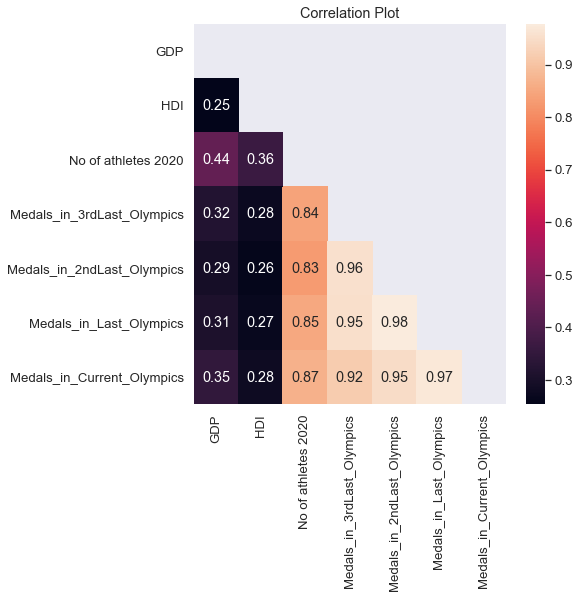

In [59]:
corr = df.corr(method='pearson')

mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(7,7))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask)
plt.title('Correlation Plot')
plt.show()

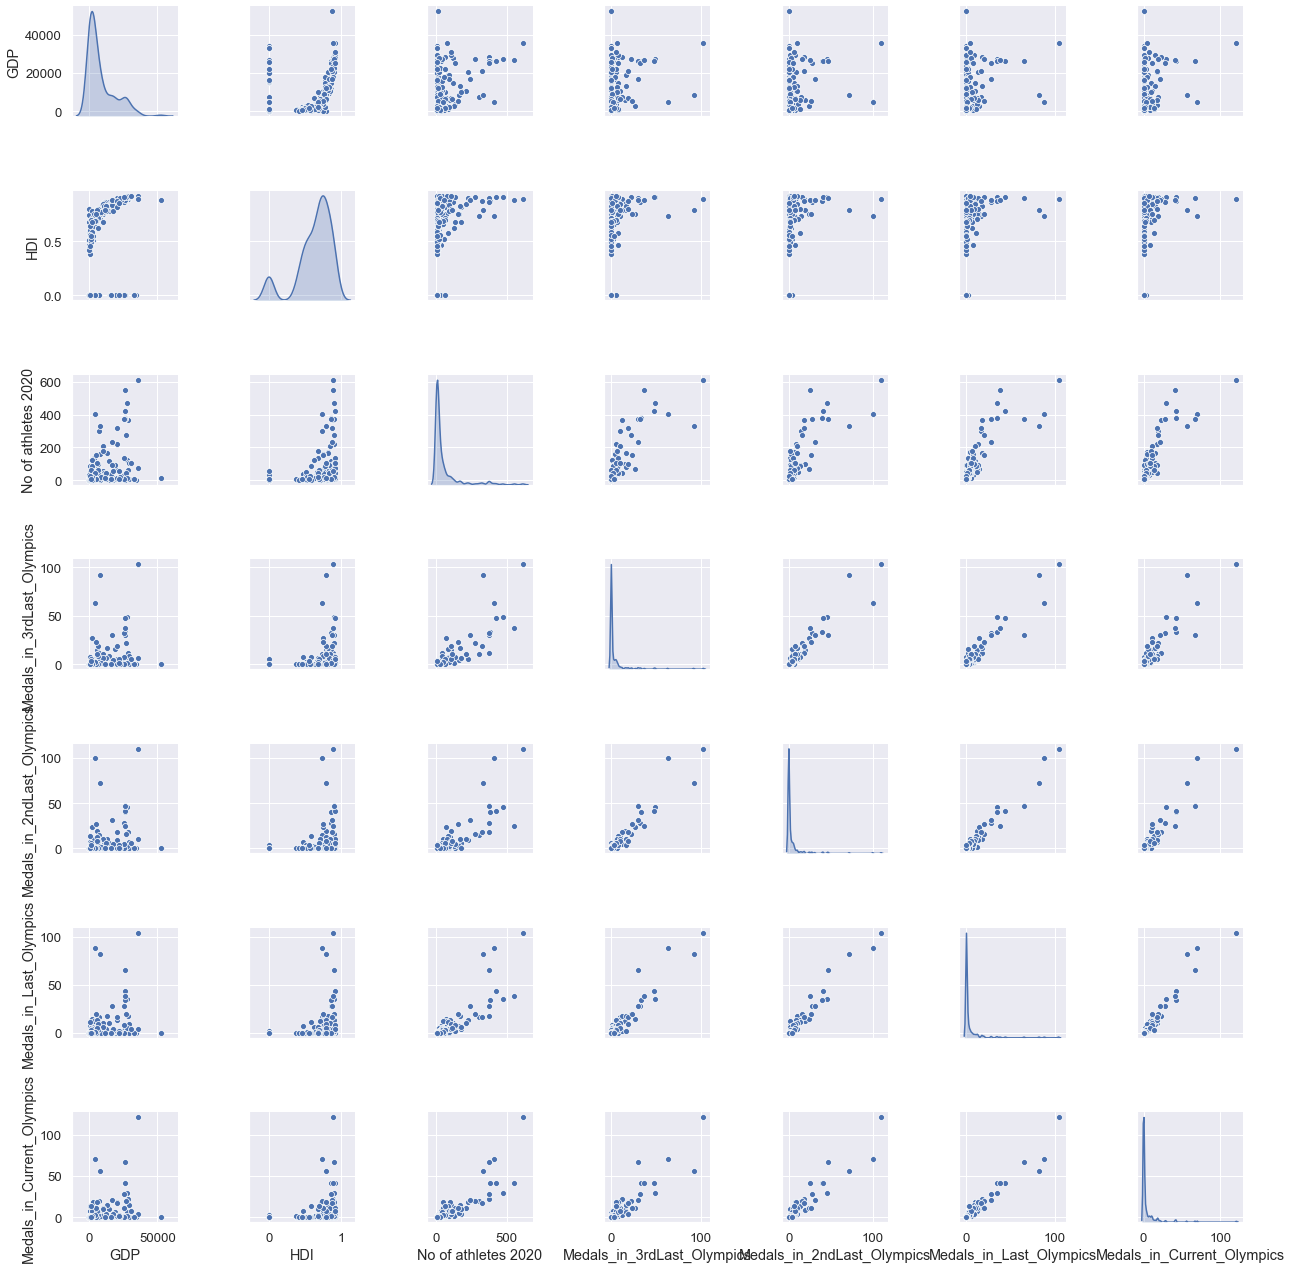

In [60]:
sns.pairplot(df, diag_kind='kde')  
plt.show()

In [11]:
# Copy all the predictor variables into X dataframe
X = df.drop('Medals_in_Current_Olympics', axis=1)

# Copy target into the y dataframe. 
y = df[['Medals_in_Current_Olympics']]

In [12]:
X.head()

,GDP,HDI,No of athletes,Medals_in_3rdLast_Olympics,Medals_in_2ndLast_Olympics,Medals_in_Last_Olympics
0,665,0.49056,3,0,1,1
1,4275,0.76320,6,0,0,0
2,5700,0.71808,64,0,2,1
3,7600,0.00000,4,0,0,0
4,18050,0.83328,5,0,0,0


In [13]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [14]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [15]:
X_train.head()


,GDP,HDI,No of athletes,Medals_in_3rdLast_Olympics,Medals_in_2ndLast_Olympics,Medals_in_Last_Olympics
124,3800,0.65856,51,3,2,1
181,22230,0.00000,60,5,4,2
154,1235,0.52128,8,0,0,0
53,5700,0.72576,29,1,2,2
94,26790,0.88224,338,37,25,38


In [16]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for GDP is 2.1000498571049604e-05
The coefficient for HDI is -0.23584156931987466
The coefficient for No of athletes is -0.004496775371776715
The coefficient for Medals_in_3rdLast_Olympics is -0.1686568791397977
The coefficient for Medals_in_2ndLast_Olympics is 0.16234008441025496
The coefficient for Medals_in_Last_Olympics is 1.1048612535480775


In [18]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.033504851325433016


In [19]:

regression_model.score(X_train, y_train)

0.9747431673873678

In [20]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.7568015211424112

In [21]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [22]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

5.859695525123974

In [23]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

2.1507577311249784

In [24]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

5.859695525123976

In [25]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

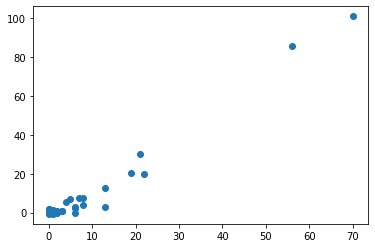

In [26]:
plt.scatter(y_test['Medals_in_Current_Olympics'], y_pred)

### Fitting into model after scaling the data

In [27]:
#from scipy.stats import zscore

#X_train_scaled  = X_train.apply(zscore)
#X_test_scaled = X_test.apply(zscore)
#y_train_scaled = y_train.apply(zscore)
#y_test_scaled = y_test.apply(zscore)

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)
X_train_scaled = scalerX.transform(X_train)
y_train_scaled = scalery.transform(y_train)
X_test_scaled = scalerX.transform(X_test)
y_test_Scaled = scalery.transform(y_test)

In [28]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [29]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for GDP is 0.014631642700912662
The coefficient for HDI is -0.004452804805506472
The coefficient for No of athletes is -0.033830889660717955
The coefficient for Medals_in_3rdLast_Olympics is -0.14948973339737906
The coefficient for Medals_in_2ndLast_Olympics is 0.14811688268571735
The coefficient for Medals_in_Last_Olympics is 1.0083649001838428


In [30]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -6.669376363167678e-18


In [31]:

regression_model.score(X_train_scaled, y_train_scaled)

0.9747431673873678

In [32]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_Scaled)

0.7568015211424081

In [33]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test_scaled)-y_test_Scaled)**2)

In [34]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.4329851488936867

In [35]:
#RMSE on Testing data
predicted_test_scaled=regression_model.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_Scaled,predicted_test_scaled))

0.4329851488936867

In [36]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test_scaled)

In [37]:
y_pred_inverse = scalery.inverse_transform(y_pred)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [42]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

GDP ---> 2.1956416831401735
HDI ---> 2.1449304270458485
No of athletes ---> 5.301291433108347
Medals_in_3rdLast_Olympics ---> 14.425375881909101
Medals_in_2ndLast_Olympics ---> 29.610057782363054
Medals_in_Last_Olympics ---> 28.562929480383954


# Predicting 2021 medal counts

In [43]:
df_2021 = pd.read_csv("Olympics_Medal_Tally_2021.csv", encoding = "ISO-8859-1", engine='python')  

In [44]:
df_2021.head()

,Country_Id,Country,GDP,HDI,No of athletes 2020,Medals_in_3rdLast_Olympics,Medals_in_2ndLast_Olympics,Medals_in_Last_Olympics,Medals_in_Current_Olympics
0,20210001,Afghanistan,700,0.511,5,1,1,0,NaN
1,20210002,Albania,4500,0.795,9,0,0,0,NaN
2,20210003,Algeria,6000,0.748,44,2,1,2,NaN
3,20210004,American Samoa,8000,NaN,6,0,0,0,NaN
4,20210005,Andorra,19000,0.868,2,0,0,0,NaN


In [45]:
df_2021= df_2021.drop('Medals_in_Current_Olympics', axis=1)

In [46]:
df_2021[df_2021.isna().any(axis=1)]

,Country_Id,Country,GDP,HDI,No of athletes 2020,Medals_in_3rdLast_Olympics,Medals_in_2ndLast_Olympics,Medals_in_Last_Olympics
3,20210004,American Samoa,8000,NaN,6,0,0,0
9,20210010,Aruba,28000,NaN,3,0,0,0
21,20210022,Bermuda,36000,NaN,2,0,0,0
27,20210028,British Virgin Islands,16000,NaN,3,0,0,0
36,20210037,Cayman Islands,35000,NaN,6,0,0,0
43,20210044,Cook Islands,5000,NaN,6,0,0,0
63,20210064,Federated States of Micronesia,0,NaN,3,0,0,0
75,20210076,Guam,19950,NaN,5,0,0,0
99,20210100,Kosovo,0,NaN,11,0,0,1
121,20210122,Monaco,25650,NaN,6,0,0,0


In [47]:
#Imputing missing value
for column in df_2021.columns:
    if df_2021[column].dtype != 'object':
        mean = df_2021[column].mean()
        df_2021[column] = df_2021[column].fillna(mean)    
        
df_2021.isnull().sum() 

Country_Id                    0
Country                       0
GDP                           0
HDI                           0
No of athletes 2020           0
Medals_in_3rdLast_Olympics    0
Medals_in_2ndLast_Olympics    0
Medals_in_Last_Olympics       0
dtype: int64

In [48]:
df_2021_pred = df_2021[['GDP','HDI','No of athletes 2020','Medals_in_3rdLast_Olympics', 'Medals_in_2ndLast_Olympics','Medals_in_Last_Olympics']]

In [49]:
#df_2021_pred_scaled  = df_2021_pred.apply(zscore)
df_2021_pred_scaled = scalerX.transform(df_2021_pred)


In [50]:
y_pred_2021=regression_model.predict(df_2021_pred_scaled)
y_pred_2021_inverse=scalery.inverse_transform(y_pred_2021)
y_pred_2021_inverse_round=y_pred_2021_inverse.round()
count = len(y_pred_2021_inverse_round)
y_pred_2021_inverse_round_final = y_pred_2021_inverse_round.view()
i=0
while i < count:
    if y_pred_2021_inverse_round[i] < 0:
        y_pred_2021_inverse_round_final[i]=((int(y_pred_2021_inverse_round[i]))*(-1))
    elif y_pred_2021_inverse_round[i] == -0:
        y_pred_2021_inverse_round_final[i]=((int(y_pred_2021_inverse_round[i]))*(-1))
    else:
        y_pred_2021_inverse_round_final[i]=int(y_pred_2021_inverse_round[i])
    i=i+1
df_2021['Medals_in_Current_Olympics'] = y_pred_2021_inverse_round_final


In [51]:
y_pred_2021_inverse_round_final

array([[  0.],
       [  0.],
       [  2.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  3.],
       [  4.],
       [  0.],
       [ 28.],
       [  1.],
       [ 20.],
       [  2.],
       [  2.],
       [  0.],
       [  0.],
       [  8.],
       [  7.],
       [  0.],
       [  0.],
       [  1.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [ 20.],
       [  0.],
       [  0.],
       [  3.],
       [  0.],
       [  1.],
       [  0.],
       [  0.],
       [ 23.],
       [  0.],
       [  1.],
       [  0.],
       [  0.],
       [  0.],
       [ 73.],
       [  9.],
       [  0.],
       [  0.],
       [  0.],
       [ 11.],
       [ 10.],
       [  0.],
       [ 11.],
       [  0.],
       [ 17.],
       [  0.],
       [  0.],
       [  1.],
       [  0.],
       [  0.],
       [  3.],
       [  0.],
       [  0.],
       [  0.],
       [  1.],
       [  0.],
       [  8.],
       [  0.],
       [  1.],
       [  1.],
       [ 4

In [52]:
df_2021.head()

,Country_Id,Country,GDP,HDI,No of athletes 2020,Medals_in_3rdLast_Olympics,Medals_in_2ndLast_Olympics,Medals_in_Last_Olympics,Medals_in_Current_Olympics
0,20210001,Afghanistan,700,0.511000,5,1,1,0,0.0
1,20210002,Albania,4500,0.795000,9,0,0,0,0.0
2,20210003,Algeria,6000,0.748000,44,2,1,2,2.0
3,20210004,American Samoa,8000,0.723914,6,0,0,0,0.0
4,20210005,Andorra,19000,0.868000,2,0,0,0,0.0


In [54]:
df_2021.to_csv("Olympics_Medal_Tally_2021 - code.csv")